In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import svm
from itertools import zip_longest
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import string

In [56]:
nltk.download('punkt')
nltk.download('stopwords')
exclude = set(string.punctuation) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
# Tokenização
def tokenize(text):
    # Tokenização
    tokens = nltk.word_tokenize(text)
    
    # Stemização
    stems  = []
    for item in tokens:
        stems.append(nltk.stem.snowball.SnowballStemmer('english').stem(item))
    return stems

# Remoção de pontuação
def dot_remove(x): 
    try: 
        x = ''.join(ch for ch in x if ch not in exclude) 
    except: 
        pass 
    return x 

In [58]:
dt_train = pd.read_csv('train.csv', low_memory=False)
dt_test = pd.read_csv('test.csv', low_memory=False)

In [59]:
dt_train.head()

,id,misogynous,text
0,0,0,ME: WORKING REMOTELY DOING THE CHORES DOING GR...
1,1,1,imgilip.com Divorce Childrens well-being Woman...
2,2,1,"A GIRL WHO SHOWS A LOT, HAS LITTLE TO OFFER"
3,3,1,Feminist: we can do everything that men do Men...
4,4,1,r/ConservativeMemes Posted by u/undue-influenc...


In [60]:
# Removendo a pontuação
dt_train['text'] = dt_train['text'].apply(dot_remove).str.lower()
dt_test['text'] = dt_test['text'].apply(dot_remove).str.lower()

In [61]:
dt_train.head()

,id,misogynous,text
0,0,0,me working remotely doing the chores doing gro...
1,1,1,imgilipcom divorce childrens wellbeing woman w...
2,2,1,a girl who shows a lot has little to offer
3,3,1,feminist we can do everything that men do men ...
4,4,1,rconservativememes posted by uundueinfluence 1...


In [62]:
x_train, x_test, y_train, y_test = train_test_split(dt_train[['text']], dt_train.misogynous, train_size=0.8, random_state=42)

In [63]:
x_train.head()

,text
4664,e w makes buder dowder modern feminists should...
4411,14 year old female cousin exist 34 year old u...
7448,what she said india needs feminism because i d...
1919,i go to the gym alot it makes getting girls al...
1298,hey girl you know what would look good on you ...


In [32]:
# Separação dos dados quando para PREDIÇÃO REAL.
x_train = dt_train[['text']]
y_train = dt_train.misogynous
x_test = dt_test[['text']]

In [64]:
stop_words = nltk.corpus.stopwords.words('english')

text_clf = Pipeline([# vectorize
                     ('vect', TfidfVectorizer(tokenizer=tokenize, 
                                              stop_words = stop_words,
                                              ngram_range=(1, 2))),
                     #classifier
                     ('clf', svm.SVC(kernel='linear')),
                     ])
# 1 - svm.SVC(kernel='linear')
# 2 - MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(70, ), random_state=1, verbose=True)
# 3 - RandomForestClassifier(n_estimators=25, max_depth=None, min_samples_split=2, random_state=3)

In [65]:
text_clf = text_clf.fit(x_train.text, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.76      0.79      0.77       725
           1       0.79      0.76      0.78       775

    accuracy                           0.77      1500
   macro avg       0.77      0.78      0.77      1500
weighted avg       0.78      0.77      0.77      1500


Accuracy: 77.467%

Confusion Matrix:


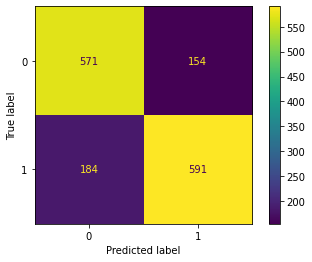

In [66]:
# Verificação de Métricas para medir o desempenho da Classificação.
y_true, y_pred = y_test, text_clf.predict(x_test.text)
c = confusion_matrix(y_test, y_pred)
print(classification_report(y_true, y_pred))
print('\nAccuracy: {:.3f}%'.format(float(accuracy_score(y_test, y_pred) * 100)))
print('\nConfusion Matrix:')
disp = ConfusionMatrixDisplay(confusion_matrix=c,
                              display_labels=text_clf.classes_)
disp.plot()

In [35]:
# Predição dos dados de Teste.
j = text_clf.predict(x_test.text)

In [36]:
# PARA SUBMISSÃO
submission = pd.DataFrame.from_records(zip_longest(dt_test['id'], j), columns=['ID', 'misogynous'])

submission.set_index('ID').to_csv('submission.csv')

In [ ]:
submission

,ID,misogynous
0,7496,1
1,7500,1
2,7501,1
3,7503,0
4,7504,1
...,...,...
2495,9995,0
2496,9996,0
2497,9997,1
2498,9998,1
